In [1]:
#imports and notebook settings
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', None)

In [2]:
df1 = pd.read_csv('WHR_combined_dataset.csv')
df1.head()

,year,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
0,2015,Switzerland,Western Europe,Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2015,Iceland,Northern Europe,Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2015,Denmark,Northern Europe,Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,2015,Norway,Northern Europe,Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,2015,Canada,Northern America,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# Making Changes to Dataset to Fix Country name discrepancies. See bottom most cells for more details. 

df1['country'] = df1['country'].str.replace('&', 'and')
df1['country'] = df1['country'].str.replace('region', 'Region')
df1['country'] = df1['country'].str.replace('North Macedonia', 'Macedonia')
df1['country'] = df1['country'].str.replace(' Province of China', '')
df1['country'] = df1['country'].str.replace('Northern', 'North')

<h1>1. Which factors contribute to overall happiness?</h1>

In [4]:
df1.loc[: , ['economy', 'family', 'life_expectancy', 'freedom', 'govt_trust', 'generosity', 'dystopia_residual','happiness_score']].corr(method='pearson')

,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual,happiness_score
economy,1.000000,0.585966,0.784338,0.340511,0.299986,-0.014560,0.022735,0.789284
family,0.585966,1.000000,0.572650,0.420361,0.127612,-0.037262,-0.093639,0.648799
life_expectancy,0.784338,0.572650,1.000000,0.340745,0.249926,0.010638,0.001321,0.742456
freedom,0.340511,0.420361,0.340745,1.000000,0.460238,0.290706,0.040465,0.551258
govt_trust,0.299986,0.127612,0.249926,0.460238,1.000000,0.319023,0.008465,0.395792
generosity,-0.014560,-0.037262,0.010638,0.290706,0.319023,1.000000,-0.053613,0.137578
dystopia_residual,0.022735,-0.093639,0.001321,0.040465,0.008465,-0.053613,1.000000,0.475509
happiness_score,0.789284,0.648799,0.742456,0.551258,0.395792,0.137578,0.475509,1.000000


<h3>From the correlation plot it seems like Economy (GDP_per_capita), Life Expectancy (Health and Wellness) and Family (Amount of Social Support) are major contributors to overall happiness.</h3>
<ul>
    <li>Economy and Life Expectancy are positively highly correlated, maybe because high standard of living results in better treatment of illnesses.</li>
    <li>Family is moderately positively correlated to economy and life expectancy, good economy can increase social support, but not necessarily, as it depends on people.</li>
    <li>Freedom (to make life choices) is slightly postively correlated with family (social support) and government trust. It is the 4th major contributor to overall happiness, at around 55 %</li> 
</ul>

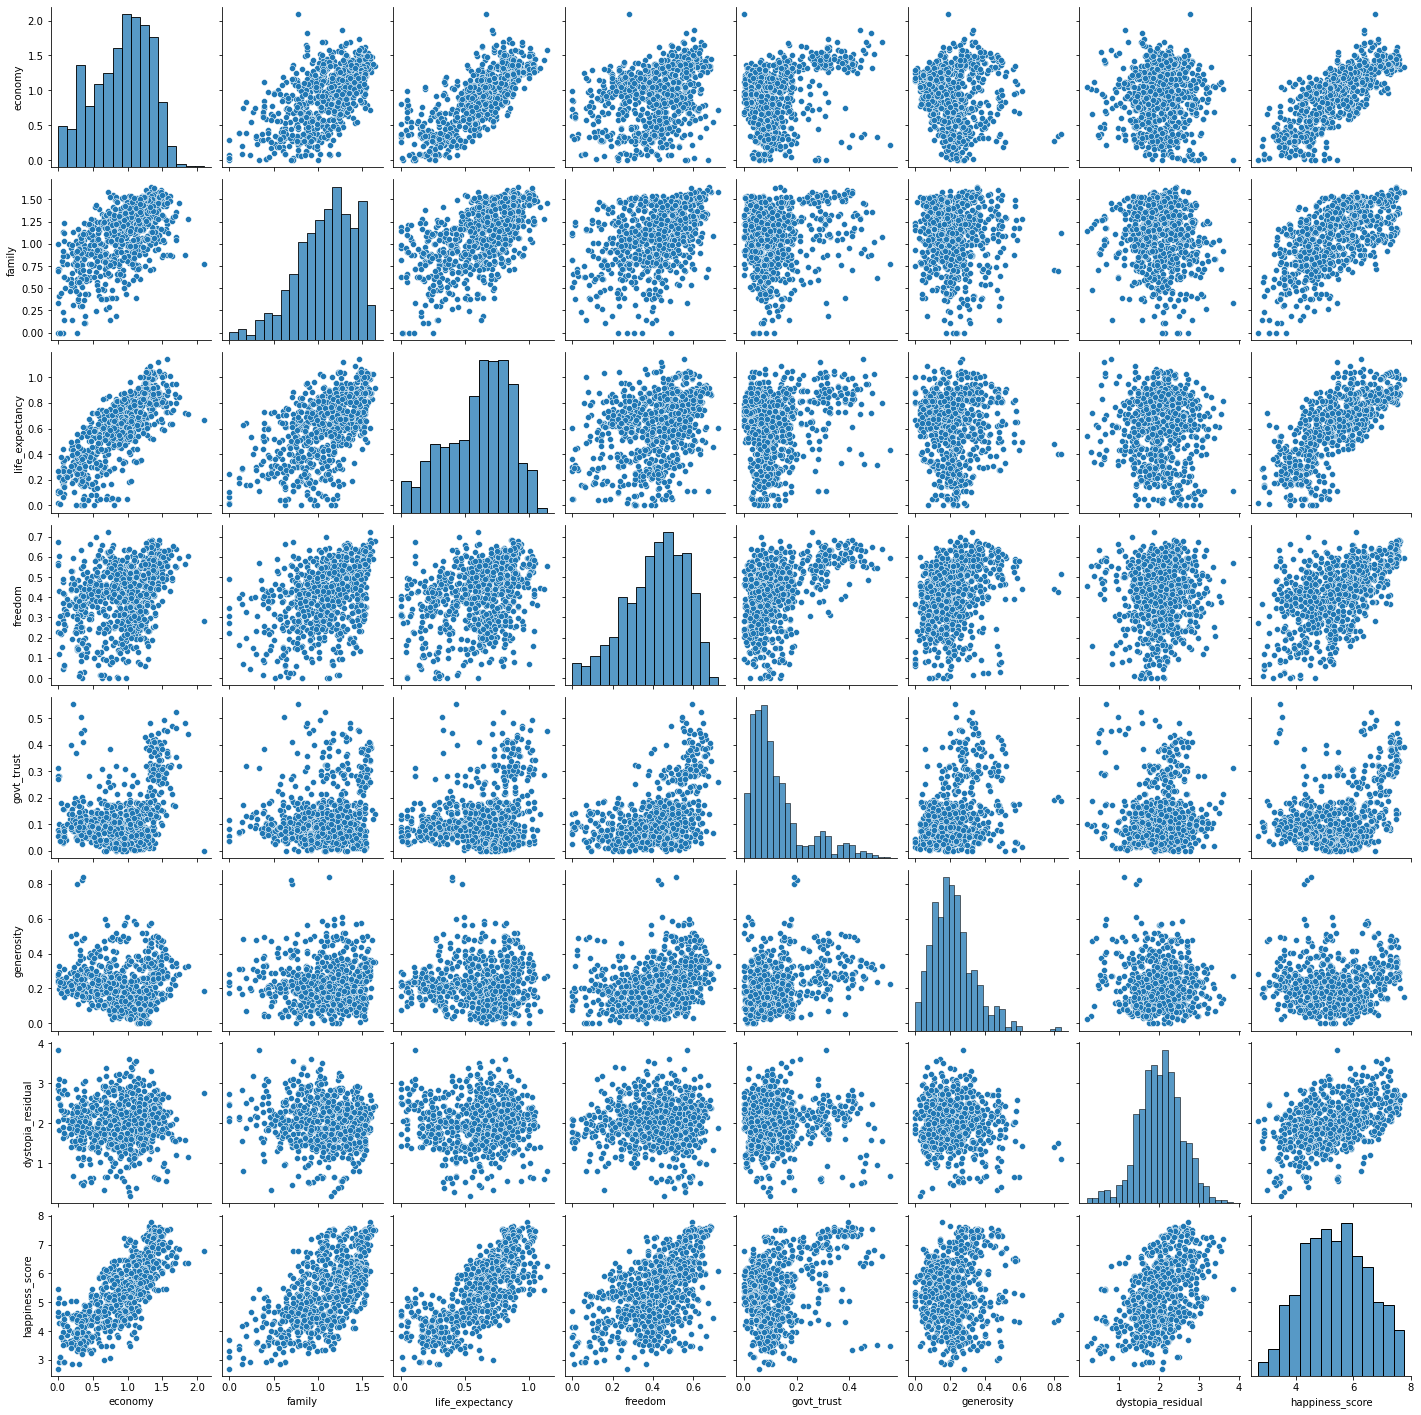

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_data = df1.loc[: , ['economy', 'family', 'life_expectancy', 'freedom', 'govt_trust', 'generosity', 'dystopia_residual','happiness_score']]

sns.pairplot(pairplot_data)
plt.show()

<h1>2. What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?</h1>

In [5]:
rank_1 = df1[['year', 'country', 'continent', 'happiness_rank']].where(df1['happiness_rank'] == 1).dropna()
rank_1[['year', 'happiness_rank']] = rank_1[['year', 'happiness_rank']].astype(int)
rank_1

,year,country,continent,happiness_rank
0,2015,Switzerland,Europe,1
158,2016,Denmark,Europe,1
315,2017,Norway,Europe,1
470,2018,Finland,Europe,1
626,2019,Finland,Europe,1


<h3>Countries with highest Economy (GDP_per_capita)</h3>

In [6]:
highest_economy = df1.sort_values(by = ['year', 'economy'], ascending =[True, False])
highest_economy.groupby('year').first()

,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
year,,,,,,,,,,,,
2015,Qatar,Western Asia,Asia,28,6.611,1.690420,1.078600,0.797330,0.640400,0.522080,0.325730,1.556740
2016,Qatar,Western Asia,Asia,36,6.375,1.824270,0.879640,0.717230,0.566790,0.480490,0.323880,1.582240
2017,Qatar,Western Asia,Asia,35,6.375,1.870766,1.274297,0.710098,0.604131,0.439299,0.330474,1.145464
2018,United Arab Emirates,Western Asia,Asia,20,6.774,2.096000,0.776000,0.670000,0.284000,0.000000,0.186000,2.762000
2019,Qatar,Western Asia,Asia,29,6.374,1.684000,1.313000,0.871000,0.555000,0.167000,0.220000,1.564000


<h3>Countries with highest Social Support (family)</h3>

In [7]:
highest_socialsup = df1.sort_values(by = ['year', 'family'], ascending =[True, False])
highest_socialsup.groupby('year').first()

,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
year,,,,,,,,,,,,
2015,Iceland,Northern Europe,Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.43630,2.702010
2016,Iceland,Northern Europe,Europe,3,7.501,1.426660,1.183260,0.867330,0.566240,0.149750,0.47678,2.831370
2017,Iceland,Northern Europe,Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.47554,2.322715
2018,Iceland,Northern Europe,Europe,4,7.495,1.343000,1.644000,0.914000,0.677000,0.138000,0.35300,2.426000
2019,Iceland,Northern Europe,Europe,4,7.494,1.380000,1.624000,1.026000,0.591000,0.118000,0.35400,2.401000


<h3>Countries with highest Life Expectancy</h3>

In [8]:
highest_lifexp = df1.sort_values(by = ['year', 'life_expectancy'], ascending =[True, False])
highest_lifexp.groupby('year').first()

,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
year,,,,,,,,,,,,
2015,Singapore,South-eastern Asia,Asia,24,6.798,1.521860,1.020000,1.025250,0.542520,0.492100,0.311050,1.885010
2016,Hong Kong,Eastern Asia,Asia,75,5.458,1.510700,0.870210,0.952770,0.480790,0.316470,0.400970,0.926140
2017,Singapore,South-eastern Asia,Asia,26,6.572,1.692278,1.353814,0.949492,0.549841,0.464308,0.345966,1.216362
2018,Hong Kong,Eastern Asia,Asia,76,5.430,1.405000,1.290000,1.030000,0.524000,0.291000,0.246000,0.644000
2019,Singapore,South-eastern Asia,Asia,34,6.262,1.572000,1.463000,1.141000,0.556000,0.453000,0.271000,0.806000


<h3>Countries with Freedom (freedom to make life choices)</h3>

In [9]:
highest_freedom = df1.sort_values(by = ['year', 'freedom'], ascending =[True, False])
highest_freedom.groupby('year').first()

,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
year,,,,,,,,,,,,
2015,Norway,Northern Europe,Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
2016,Uzbekistan,Central Asia,Asia,49,5.987,0.735910,1.168100,0.501630,0.608480,0.283330,0.343260,2.346380
2017,Uzbekistan,Central Asia,Asia,47,5.971,0.786441,1.548969,0.498273,0.658249,0.246528,0.415984,1.816914
2018,Uzbekistan,Central Asia,Asia,44,6.096,0.719000,1.584000,0.605000,0.724000,0.259000,0.328000,1.877000
2019,Uzbekistan,Central Asia,Asia,41,6.174,0.745000,1.529000,0.756000,0.631000,0.240000,0.322000,1.951000


<h3>Countries with highest Government Trust (level of corruption)</h3>

In [10]:
highest_trust = df1.sort_values(by = ['year', 'govt_trust'], ascending =[True, False])
highest_trust.groupby('year').first()

,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
year,,,,,,,,,,,,
2015,Rwanda,Eastern Africa,Africa,154,3.465,0.222080,0.773700,0.428640,0.592010,0.551910,0.226280,0.670420
2016,Rwanda,Eastern Africa,Africa,152,3.515,0.328460,0.615860,0.318650,0.543200,0.505210,0.235520,0.968190
2017,Singapore,South-eastern Asia,Asia,26,6.572,1.692278,1.353814,0.949492,0.549841,0.464308,0.345966,1.216362
2018,Singapore,South-eastern Asia,Asia,34,6.343,1.529000,1.451000,1.008000,0.631000,0.457000,0.261000,1.006000
2019,Singapore,South-eastern Asia,Asia,34,6.262,1.572000,1.463000,1.141000,0.556000,0.453000,0.271000,0.806000


<h3>Countries with highest Generosity</h3>

In [11]:
highest_generosity = df1.sort_values(by = ['year', 'generosity'], ascending =[True, False])
highest_generosity.groupby('year').first()

,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
year,,,,,,,,,,,,
2015,Myanmar,South-eastern Asia,Asia,129,4.307,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,1.41805
2016,Myanmar,South-eastern Asia,Asia,119,4.395,0.341120,0.699810,0.398800,0.426920,0.202430,0.819710,1.50655
2017,Myanmar,South-eastern Asia,Asia,114,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,1.11529
2018,Myanmar,South-eastern Asia,Asia,130,4.308,0.682000,1.174000,0.429000,0.580000,0.178000,0.598000,0.66700
2019,Myanmar,South-eastern Asia,Asia,131,4.360,0.710000,1.181000,0.555000,0.525000,0.172000,0.566000,0.65100


<h1>PIVOTING:</h1>

In [12]:
#add region1 for more detailed table.
#use fillna(0) if you want to analyze countries that are not present in one or more datasets
master_pivot = pd.pivot_table(df1, index = ['continent', 'region1', 'country'], columns ='year', values='happiness_rank').dropna()
master_pivot.sort_values(by =['continent', 'region1', 2015], ascending = [True, True, True], inplace = True)
master_pivot

year                                     2015   2016   2017   2018   2019
continent     region1        country                                     
Africa        Eastern Africa Mauritius   71.0   66.0   64.0   55.0   57.0
                             Zambia      85.0  106.0  116.0  125.0  138.0
                             Zimbabwe   115.0  131.0  138.0  144.0  146.0
                             Ethiopia   122.0  115.0  119.0  127.0  134.0
                             Kenya      125.0  122.0  112.0  124.0  121.0
...                                       ...    ...    ...    ...    ...
South America South America  Colombia    33.0   31.0   36.0   37.0   43.0
                             Ecuador     48.0   51.0   44.0   48.0   50.0
                             Bolivia     51.0   59.0   58.0   62.0   61.0
                             Paraguay    53.0   70.0   70.0   64.0   63.0
                             Peru        58.0   64.0   63.0   65.0   65.0

[146 rows x 5 columns]

In [13]:
rank_comparison = pd.pivot_table(df1, index = ['continent', 'country',], columns = 'year', values = 'happiness_rank').dropna()
rank_comparison.sort_values(by=[2015], inplace=True)
rank_comparison

year                        2015   2016   2017   2018   2019
continent     country                                       
Europe        Switzerland    1.0    2.0    4.0    5.0    6.0
              Iceland        2.0    3.0    3.0    4.0    4.0
              Denmark        3.0    1.0    2.0    3.0    2.0
              Norway         4.0    4.0    1.0    2.0    3.0
North America Canada         5.0    6.0    7.0    7.0    9.0
...                          ...    ...    ...    ...    ...
Africa        Rwanda       154.0  152.0  151.0  151.0  152.0
              Benin        155.0  153.0  143.0  136.0  102.0
Asia          Syria        156.0  156.0  152.0  150.0  149.0
Africa        Burundi      157.0  157.0  154.0  156.0  145.0
              Togo         158.0  155.0  150.0  139.0  139.0

[146 rows x 5 columns]

In [14]:
rank_comparison.rename(columns = {2015:'2015', 2016:'2016', 2017:'2017', 2018:'2018', 2019:'2019'}, inplace=True)

rank_comparison['2015'] = rank_comparison['2015'].astype(int)
rank_comparison['2016'] = rank_comparison['2016'].astype(int)
rank_comparison['2017'] = rank_comparison['2017'].astype(int)
rank_comparison['2018'] = rank_comparison['2018'].astype(int)
rank_comparison['2019'] = rank_comparison['2019'].astype(int)

rank_comparison['15_16_change'] = rank_comparison['2015'] - rank_comparison['2016']
rank_comparison['16_17_change'] = rank_comparison['2016'] - rank_comparison['2017']
rank_comparison['17_18_change'] = rank_comparison['2017'] - rank_comparison['2018']
rank_comparison['18_19_change'] = rank_comparison['2018'] - rank_comparison['2019']
rank_comparison['4_year_change'] = rank_comparison['2015'] - rank_comparison['2019']

# grouped by continent, sorted by 4_year_change
rank_comparison.sort_values(by = ['continent', '4_year_change'], inplace=True)
rank_comparison

year                    2015  2016  2017  2018  2019  15_16_change  \
continent     country                                                
Africa        Zambia      85   106   116   125   138           -21   
              Zimbabwe   115   131   138   144   146           -16   
              Liberia    116   150   148   149   141           -34   
              Algeria     68    38    53    84    88            30   
              Botswana   128   137   142   146   148            -9   
...                      ...   ...   ...   ...   ...           ...   
South America Paraguay    53    70    70    64    63           -17   
              Peru        58    64    63    65    65            -6   
              Ecuador     48    51    44    48    50            -3   
              Uruguay     32    29    28    31    33             3   
              Chile       27    24    20    25    26             3   

year                    16_17_change  17_18_change  18_19_change  \
continent     country                                              
Africa        Zambia             -10            -9           -13   
              Zimbabwe            -7            -6            -2   
              Liberia              2            -1             8   
              Algeria            -15           -31            -4   
              Botswana            -5            -4            -2   
...                              ...           ...           ...   
South America Paraguay             0             6             1   
              Peru                 1            -2             0   
              Ecuador              7            -4            -2   
              Uruguay              1            -3            -2   
              Chile                4            -5            -1   

year                    4_year_change  
continent     country                  
Africa        Zambia              -53  
              Zimbabwe            -31  
              Liberia             -25  
              Algeria             -20  
              Botswana            -20  
...                               ...  
South America Paraguay            -10  
              Peru                 -7  
              Ecuador              -2  
              Uruguay              -1  
              Chile                 1  

[146 rows x 10 columns]

In [15]:
pos_neg_count = rank_comparison.groupby('continent')['4_year_change'].apply(lambda x: pd.Series([(x < 0).sum(), (x >= 0).sum()])).unstack()
pos_neg_count.rename(columns = {0:'neg_total', 1:'pos_total'}, inplace=True)

pos_neg_count['count_total'] = pos_neg_count['neg_total'] + pos_neg_count['pos_total']

pos_neg_count['neg_POT'] = (pos_neg_count['neg_total']/pos_neg_count['count_total'])*100
pos_neg_count['neg_POT'] = pos_neg_count['neg_POT'].astype(int)
pos_neg_count['pos_POT'] = 100 - pos_neg_count['neg_POT']

pos_neg_count['neg_POT'] = pos_neg_count['neg_POT'].astype(str) + ' ' + '%'
pos_neg_count['pos_POT'] = pos_neg_count['pos_POT'].astype(str) + ' ' + '%'

#percent of total calculations
pos_neg_count

,neg_total,pos_total,count_total,neg_POT,pos_POT
continent,,,,,
Africa,14,22,36,38 %,62 %
Asia,28,16,44,63 %,37 %
Europe,8,33,41,19 %,81 %
North America,5,8,13,38 %,62 %
Oceania,1,1,2,50 %,50 %
South America,9,1,10,90 %,10 %


<ul>
<li>Over 80 Percent of Countries in Europe (in our dataset) saw a positive growth of happiness over 4 years. </li>
<li>On the Other hand 90 Percent of countries in South America saw a decrease in overall happiness from 2015 to 2019. </li>
<li>While in Asia there were over 60 percent of countries that saw a decrease in overall happiness in those 4 years. </li></ul>
<br>
<b>NOTE</b>: We can drill down further by analyzing regions within continents that saw postive or negative growth in 4 years. Also it would be very interesting to observe the effects of COVID-19 Pandemic on the happiness of people in countries all around the world. 2019 - 2020 was a crazy peiod in our world. Even 2021 is not looking that great. <br>
<h3><i>Some noteworthy countries to analyze (future scope) </i> : Lebanon (Beirut Explosion Incident), Iran (USA - Iran Conflict), Mynmar (Military Coup), Australia (Bushfires), USA (Turmoil within the country, Wildfires, Being the hardest hit country by the Pandemic) </h3>

<h3>Let us focus on countries with drastic increase or decrease in happiness rank.</h3>

In [16]:
#grouped by continent, sorted from lowest to highest. 
drastic_changes = rank_comparison[(rank_comparison['4_year_change'] >= 10) | (rank_comparison['4_year_change'] <= -10)].sort_values(by=['continent', '4_year_change'])
drastic_changes

year                     2015  2016  2017  2018  2019  15_16_change  \
continent     country                                                 
Africa        Zambia       85   106   116   125   138           -21   
              Zimbabwe    115   131   138   144   146           -16   
              Liberia     116   150   148   149   141           -34   
              Algeria      68    38    53    84    88            30   
              Botswana    128   137   142   146   148            -9   
...                       ...   ...   ...   ...   ...           ...   
South America Argentina    30    26    24    29    47             4   
              Brazil       16    17    22    28    32            -1   
              Colombia     33    31    36    37    43             2   
              Bolivia      51    59    58    62    61            -8   
              Paraguay     53    70    70    64    63           -17   

year                     16_17_change  17_18_change  18_19_change  \
continent     country                                               
Africa        Zambia              -10            -9           -13   
              Zimbabwe             -7            -6            -2   
              Liberia               2            -1             8   
              Algeria             -15           -31            -4   
              Botswana             -5            -4            -2   
...                               ...           ...           ...   
South America Argentina             2            -5           -18   
              Brazil               -5            -6            -4   
              Colombia             -5            -1            -6   
              Bolivia               1            -4             1   
              Paraguay              0             6             1   

year                     4_year_change  
continent     country                   
Africa        Zambia               -53  
              Zimbabwe             -31  
              Liberia              -25  
              Algeria              -20  
              Botswana             -20  
...                                ...  
South America Argentina            -17  
              Brazil               -16  
              Colombia             -10  
              Bolivia              -10  
              Paraguay             -10  

[82 rows x 10 columns]

In [17]:
#2, 10, 7, 34 - NET GAIN OVER 4 YEARS: 53
df1[df1['country'] == 'Benin']

,year,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
154,2015,Benin,Western Africa,Africa,155,3.340,0.286650,0.35386,0.31910,0.484500,0.080100,0.182600,1.633280
310,2016,Benin,Western Africa,Africa,153,3.484,0.394990,0.10419,0.21028,0.397470,0.066810,0.201800,2.108120
457,2017,Benin,Western Africa,Africa,143,3.657,0.431085,0.43530,0.20993,0.425963,0.060929,0.207948,1.885631
605,2018,Benin,Western Africa,Africa,136,4.141,0.378000,0.37200,0.24000,0.440000,0.067000,0.163000,2.481000
727,2019,Benin,Western Africa,Africa,102,4.883,0.393000,0.43700,0.39700,0.349000,0.082000,0.175000,3.050000


<h3>There are many variables that affect overall happiness of a country. Both external and internal.<br>Take a look at the effect of some variables here:
<a href= 'https://databank.worldbank.org/reports.aspx?source=2&country=BEN'>Benin, World Bank Data</a></h3>

In [18]:
# -21, -38, -20, -6 - NET LOSS OVER 4 YEARS: 85 
df1[df1['country'] == 'Venezuela']

,year,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
22,2015,Venezuela,South America,South America,23,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.05841,3.191310
201,2016,Venezuela,South America,South America,44,6.084,1.133670,1.033020,0.619040,0.198470,0.083040,0.04250,2.974680
396,2017,Venezuela,South America,South America,82,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.06502,1.789464
571,2018,Venezuela,South America,South America,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.05600,1.443000
733,2019,Venezuela,South America,South America,108,4.707,0.960000,1.427000,0.805000,0.154000,0.047000,0.06400,1.250000


<h3>The primary cause of this huge drop in Venezuela's rank over the years is due to power struggles within the country, and external factors to some degree, leading to a huge dip in GDP, Hyperinflation, Food, Medicine, Power Shortage, Mass Migration to name a few. It would be interesting to see if and how Venezuela recovers in the coming years. It's going to be hard due to the current state of Pandemic.</h3>
<br>
Read more about the crisis here: <a href = 'https://www.bbc.com/news/world-latin-america-36319877'>Venezuela crisis: How the political situation escalated</a><br>
<br>
<a href = 'https://www.worldeconomics.com/GrossDomesticProduct/Venezuela.gdp'>Venezuela GDP Trend</a>

<h3> *Countries that didn't experience drastic changes in rank over 4 years, however in some cases there were drastic changes in between, like Myanmar, Overall gain of -2, but its rank dropped by 16 positions in 2018 from 2017.</h3>

In [19]:
#grouped by continent, sorted by 4_year_change from highest to lowest. 
rank_comparison[(rank_comparison['4_year_change'] <= 5) & (rank_comparison['4_year_change'] >= -5)].sort_values(by=['continent', '4_year_change'], 
                                                                                                                        ascending = [True, False])

year                                   2015  2016  2017  2018  2019  \
continent     country                                                 
Africa        Uganda                    141   145   133   135   136   
              Kenya                     125   122   112   124   121   
              Madagascar                147   148   144   143   143   
              Morocco                    92    90    84    85    89   
              Mauritania                124   130   123   126   122   
              Rwanda                    154   152   151   151   152   
              Egypt                     135   120   104   122   137   
Asia          Uzbekistan                 44    49    47    44    41   
              Sri Lanka                 132   117   120   116   130   
              United Arab Emirates       20    28    21    20    21   
              Qatar                      28    36    35    32    29   
              Afghanistan               153   154   141   145   154   
              Israel                     11    11    11    19    13   
              Palestinian Territories   108   108   103   104   110   
              Myanmar                   129   119   114   130   131   
              Turkey                     76    78    69    74    79   
              Hong Kong                  72    75    71    76    76   
Europe        Finland                     6     5     5     1     1   
              France                     29    32    31    23    24   
              Austria                    13    12    13    12    10   
              Luxembourg                 17    20    18    17    14   
              Netherlands                 7     7     6     6     5   
              Ireland                    18    19    15    14    16   
              North Cyprus               66    62    61    58    64   
              Denmark                     3     1     2     3     2   
              Norway                      4     4     1     2     3   
              Sweden                      8    10     9     9     7   
              Belgium                    19    18    17    16    18   
              Iceland                     2     3     3     4     4   
              Russia                     64    56    49    59    68   
              Switzerland                 1     2     4     5     6   
North America Trinidad and Tobago        41    43    38    38    39   
              Costa Rica                 12    14    12    13    12   
              Canada                      5     6     7     7     9   
              United States              15    13    14    18    19   
Oceania       New Zealand                 9     8     8     8     8   
              Australia                  10     9    10    10    11   
South America Chile                      27    24    20    25    26   
              Uruguay                    32    29    28    31    33   
              Ecuador                    48    51    44    48    50   

year                                   15_16_change  16_17_change  \
continent     country                                               
Africa        Uganda                             -4            12   
              Kenya                               3            10   
              Madagascar                         -1             4   
              Morocco                             2             6   
              Mauritania                         -6             7   
              Rwanda                              2             1   
              Egypt                              15            16   
Asia          Uzbekistan                         -5             2   
              Sri Lanka                          15            -3   
              United Arab Emirates               -8             7   
              Qatar                              -8             1   
              Afghanistan                        -1            13   
              Israel                              0

<b>NOTE:</b>
<br>
<h3>
<ul>
<li>rank_comparison = pd.pivot_table(df1, index = 'country', columns = 'year', values = 'happiness_rank').fillna(0)</li>
<li>rank_comparison.sort_values(by=[2015], inplace=True)</li>
</ul>
</h3>
<h4>These two lines of code revelaed a discrepancy between country names in different datasets. By taking a closer look at countries and regions and with little help of Google, I infered that they are the same countries with slight variations. For example, Trinidad and Tobago, a country located in the carribean, is listed as Trinidad & Tobago in 2018 and 2019 datasets</h4>
<h4>No wonder why Data Analysts spend around 80 percent of their time cleaning datasets, because errors can pop up at any stage of Data Analysis Lifecycle, in my case it was the Analysis stage, but that's the beauty of this line of work. </h4> 

In [20]:
rank_comparison = pd.pivot_table(df1, index = 'country', columns = 'year', values = 'happiness_rank').fillna(0)
rank_comparison.sort_values(by=[2015], inplace=True)
rank_comparison

year,2015,2016,2017,2018,2019
country,,,,,
Puerto Rico,0.0,15.0,0.0,0.0,0.0
Somalia,0.0,76.0,93.0,98.0,112.0
Namibia,0.0,113.0,111.0,119.0,113.0
South Sudan,0.0,143.0,147.0,154.0,156.0
Gambia,0.0,0.0,0.0,0.0,120.0
...,...,...,...,...,...
Rwanda,154.0,152.0,151.0,151.0,152.0
Benin,155.0,153.0,143.0,136.0,102.0
Syria,156.0,156.0,152.0,150.0,149.0


In [21]:
#discrepancy as discussed above.
df1[df1['country']== 'Trinidad and Tobago']

,year,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
40,2015,Trinidad and Tobago,Caribbean,North America,41,6.168,1.211830,1.183540,0.614830,0.558840,0.011400,0.318440,2.268820
200,2016,Trinidad and Tobago,Caribbean,North America,43,6.168,1.325720,0.985690,0.526080,0.484530,0.012410,0.319350,2.513940
352,2017,Trinidad and Tobago,Caribbean,North America,38,6.168,1.361356,1.380229,0.519983,0.518631,0.008965,0.325296,2.053247


In [46]:
df1[df1['country']== 'Trinidad & Tobago']

,year,country,region1,continent,happiness_rank,happiness_score,economy,family,life_expectancy,freedom,govt_trust,generosity,dystopia_residual
507,2018,Trinidad & Tobago,Caribbean,North America,38,6.192,1.223,1.492,0.564,0.575,0.019,0.171,2.148
664,2019,Trinidad & Tobago,Caribbean,North America,39,6.192,1.231,1.477,0.713,0.489,0.016,0.185,2.081
